In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
from scipy.stats import ttest_ind
%matplotlib inline
# from utils import *
# from scipy.stats import mannwhitneyu, normaltest
# from statannotations.Annotator import Annotator
warnings.filterwarnings('ignore')

In [2]:
os.chdir("/Users/yongjia/Desktop/workstation/chickpea/karthika/Haplotype_analyses")

In [3]:
df_QTLs = pd.read_excel("Mn_signals.xlsx",sheet_name='selected',header=0)
df_QTLs.head(2)

,QTLs,SNP markers,REF,ALT,Effect,SE,p-value,Trait,Populations
0,CaMnt1-1,AVR-Ca-00379.01-047110008,A,G,0.281503,0.056380,1.094120e-07,Rtdry_perP_Mn,CA22.DVRS
1,CaMnt2-1,AVR-Ca-00518.02-013178317,G,A,0.864618,0.165819,3.568751e-08,Rtdry_perP_Mn,CA22.DVRS


In [4]:
keySNPs = list(df_QTLs["SNP markers"].unique())
keySNPs

['AVR-Ca-00379.01-047110008',
 'AVR-Ca-00518.02-013178317',
 'AVR-Ca-00897.03-013733563',
 'AVR-Ca-01956.04-038965820',
 'AVR-Ca-03386.06-049185363',
 'AVR-Ca-03429.06-050237965',
 'AVR-Ca-04314.07-009038420',
 'AVR-Ca-03868.07-018699648']

### read genotype data

In [5]:
df_geno=pd.read_csv("Karthika_Mn_threeExp_DVRS_normalized.recode.vcf",sep='\t', header=0)
df_geno.head(2)

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,Pulse.30K-0043-20-21|1020-CA22.DVRS,...,Pulse.30K-0043-09-75|46009-CA22.DVRS,Pulse.30K-0043-09-76|46010-CA22.DVRS,Pulse.30K-0043-09-77|46011-CA22.DVRS,Pulse.30K-0043-09-79|46013-CA22.DVRS,Pulse.30K-0043-09-80|46014-CA22.DVRS,Pulse.30K-0043-09-81|46015-CA22.DVRS,Pulse.30K-0043-09-82|46016-CA22.DVRS,Pulse.30K-0043-09-83|47001-CA22.DVRS,Pulse.30K-0043-09-84|47002-CA22.DVRS,Pulse.30K-0043-09-88|47006-CA22.DVRS
0,1,1083977,AVR-Ca-00001.01-001083977,G,A,.,.,.,GT,0|0,...,0|0,1|0,0|0,1|1,1|0,0|0,0|0,0|0,0|0,0|1
1,1,1084247,AVR-Ca-00002.01-001084247,T,C,.,.,.,GT,0|0,...,0|0,1|0,0|0,1|1,1|0,0|0,0|0,0|0,0|0,0|1


In [6]:
df_genoQTL = df_geno[df_geno['ID'].isin(keySNPs)] ## extract genotype for target snps

In [7]:
## extract genotype for snp
df_snps = df_genoQTL.iloc[:, [2] + list(range(9, len(df_genoQTL.columns)))]
df_snps.set_index('ID', inplace=True)
df_snps = df_snps.T
df_snps.head(2)

ID,AVR-Ca-00379.01-047110008,AVR-Ca-00518.02-013178317,AVR-Ca-00897.03-013733563,AVR-Ca-01956.04-038965820,AVR-Ca-03386.06-049185363,AVR-Ca-03429.06-050237965,AVR-Ca-03868.07-018699648,AVR-Ca-04314.07-009038420
Pulse.30K-0043-20-21|1020-CA22.DVRS,1|1,0|0,1|1,0|0,0|0,0|0,0|0,0|0
Pulse.30K-0043-20-22|1021-CA22.DVRS,1|1,0|0,1|1,0|0,0|0,0|0,0|0,0|0


In [8]:
## save hap for all replicates
for snp in keySNPs: 
    df_snps = df_snps.replace("1|0","0|1", regex=False)
    df_snps = df_snps.replace("0|0","0", regex=False)
    df_snps = df_snps.replace("0|1","2", regex=False)
    df_snps = df_snps.replace("1|1","1", regex=False)
# Columns to join keySNPs
# Create a new column 'full_name' by joining 'first_name' and 'last_name'
df_snps['hap'] = df_snps[keySNPs].apply(lambda row: ''.join(row.values.astype(str)), axis=1)
df_snps.head()

ID,AVR-Ca-00379.01-047110008,AVR-Ca-00518.02-013178317,AVR-Ca-00897.03-013733563,AVR-Ca-01956.04-038965820,AVR-Ca-03386.06-049185363,AVR-Ca-03429.06-050237965,AVR-Ca-03868.07-018699648,AVR-Ca-04314.07-009038420,hap
Pulse.30K-0043-20-21|1020-CA22.DVRS,1,0,1,0,0,0,0,0,10100000
Pulse.30K-0043-20-22|1021-CA22.DVRS,1,0,1,0,0,0,0,0,10100000
Pulse.30K-0043-20-23|1022-CA22.DVRS,1,0,1,0,0,0,0,0,10100000
Pulse.30K-0043-20-24|1023-CA22.DVRS,1,0,1,1,0,0,1,0,10110001
Pulse.30K-0043-20-26|1025-CA22.DVRS,1,0,1,0,0,0,0,0,10100000


In [9]:
df_snps.shape

(401, 9)

In [10]:
df_snps['hap'] = "H" + df_snps['hap']
df_snps.head(2)

ID,AVR-Ca-00379.01-047110008,AVR-Ca-00518.02-013178317,AVR-Ca-00897.03-013733563,AVR-Ca-01956.04-038965820,AVR-Ca-03386.06-049185363,AVR-Ca-03429.06-050237965,AVR-Ca-03868.07-018699648,AVR-Ca-04314.07-009038420,hap
Pulse.30K-0043-20-21|1020-CA22.DVRS,1,0,1,0,0,0,0,0,H10100000
Pulse.30K-0043-20-22|1021-CA22.DVRS,1,0,1,0,0,0,0,0,H10100000


In [11]:
df_snps.to_csv("df_snps.csv",index=False)

In [12]:
## get group info
df_pheno = pd.read_csv("Karthika_Mn_threeExp_phenotype_scaled_only_with_geno.csv",header=0,index_col=0, sep=',')
df_pheno.head(2)

,geno_id,geno,plot_id,category,ACCNAME,sowRL_mean_Ctl,sowRL_mean_Mn,harvestRL_mean_Ctl,harvestRL_mean_Mn,RTI_mean_Ctl,...,Stdry_perP_Mn,Rtdry_perP_Ctl,Rtdry_perP_Mn,STRTdry_perP_Ctl,STRTdry_perP_Mn,RTI,RRTI,RRtdry,RStdry,RStRtdry
0,Pulse.30K-0043-20-21|1020-CA22.DVRS,Pulse.30K-0043-20-21,1020,CA22.DVRS,1020,35.777778,27.333333,271.111111,135.944444,8.038456,...,0.065167,0.047667,0.039000,0.144944,0.104167,0.501434,0.589060,0.818182,0.669903,0.718666
1,Pulse.30K-0043-20-22|1021-CA22.DVRS,Pulse.30K-0043-20-22,1021,CA22.DVRS,1021,34.222222,33.777778,224.722222,183.333333,6.741617,...,0.191222,0.094444,0.076444,0.298278,0.267667,0.815822,0.852735,0.809412,0.938130,0.897374


In [13]:
df_join = df_pheno.merge(df_snps,left_on='geno_id',right_index=True,how='inner')
df_join.head(2)

,geno_id,geno,plot_id,category,ACCNAME,sowRL_mean_Ctl,sowRL_mean_Mn,harvestRL_mean_Ctl,harvestRL_mean_Mn,RTI_mean_Ctl,...,RStRtdry,AVR-Ca-00379.01-047110008,AVR-Ca-00518.02-013178317,AVR-Ca-00897.03-013733563,AVR-Ca-01956.04-038965820,AVR-Ca-03386.06-049185363,AVR-Ca-03429.06-050237965,AVR-Ca-03868.07-018699648,AVR-Ca-04314.07-009038420,hap
0,Pulse.30K-0043-20-21|1020-CA22.DVRS,Pulse.30K-0043-20-21,1020,CA22.DVRS,1020,35.777778,27.333333,271.111111,135.944444,8.038456,...,0.718666,1,0,1,0,0,0,0,0,H10100000
1,Pulse.30K-0043-20-22|1021-CA22.DVRS,Pulse.30K-0043-20-22,1021,CA22.DVRS,1021,34.222222,33.777778,224.722222,183.333333,6.741617,...,0.897374,1,0,1,0,0,0,0,0,H10100000


In [14]:
df_join.shape

(401, 33)

## read representative SNPs and population information
## create combination of trait, population for plot based

In [15]:
QTLs = list(df_QTLs["QTLs"].unique())
QTLs

['CaMnt1-1',
 'CaMnt2-1',
 'CaMnt3-1',
 'CaMnt4-1',
 'CaMnt6-1',
 'CaMnt7-1',
 'CaMnt7-2']

In [16]:
df_QTLs['Populations'].unique()

array(['CA22.DVRS'], dtype=object)

## for each QTL, plot all traits

## boxplot and stripplot

In [17]:
df_join.head(2)

,geno_id,geno,plot_id,category,ACCNAME,sowRL_mean_Ctl,sowRL_mean_Mn,harvestRL_mean_Ctl,harvestRL_mean_Mn,RTI_mean_Ctl,...,RStRtdry,AVR-Ca-00379.01-047110008,AVR-Ca-00518.02-013178317,AVR-Ca-00897.03-013733563,AVR-Ca-01956.04-038965820,AVR-Ca-03386.06-049185363,AVR-Ca-03429.06-050237965,AVR-Ca-03868.07-018699648,AVR-Ca-04314.07-009038420,hap
0,Pulse.30K-0043-20-21|1020-CA22.DVRS,Pulse.30K-0043-20-21,1020,CA22.DVRS,1020,35.777778,27.333333,271.111111,135.944444,8.038456,...,0.718666,1,0,1,0,0,0,0,0,H10100000
1,Pulse.30K-0043-20-22|1021-CA22.DVRS,Pulse.30K-0043-20-22,1021,CA22.DVRS,1021,34.222222,33.777778,224.722222,183.333333,6.741617,...,0.897374,1,0,1,0,0,0,0,0,H10100000


In [18]:
keySNPs

['AVR-Ca-00379.01-047110008',
 'AVR-Ca-00518.02-013178317',
 'AVR-Ca-00897.03-013733563',
 'AVR-Ca-01956.04-038965820',
 'AVR-Ca-03386.06-049185363',
 'AVR-Ca-03429.06-050237965',
 'AVR-Ca-04314.07-009038420',
 'AVR-Ca-03868.07-018699648']

In [19]:
df_QTLs

,QTLs,SNP markers,REF,ALT,Effect,SE,p-value,Trait,Populations
0,CaMnt1-1,AVR-Ca-00379.01-047110008,A,G,0.281503,0.056380,1.094120e-07,Rtdry_perP_Mn,CA22.DVRS
1,CaMnt2-1,AVR-Ca-00518.02-013178317,G,A,0.864618,0.165819,3.568751e-08,Rtdry_perP_Mn,CA22.DVRS
2,CaMnt2-1,AVR-Ca-00518.02-013178317,G,A,0.751727,0.169287,1.174673e-05,harvestRL_mean_Mn,CA22.DVRS
3,CaMnt3-1,AVR-Ca-00897.03-013733563,T,C,-0.650914,0.142402,6.555960e-06,RRTI,CA22.DVRS
4,CaMnt4-1,AVR-Ca-01956.04-038965820,T,C,0.455876,0.099243,5.917351e-06,Rtdry_perP_Mn,CA22.DVRS
5,CaMnt4-1,AVR-Ca-01956.04-038965820,T,C,0.408920,0.095176,2.201833e-05,STRTdry_perP_Mn,CA22.DVRS
6,CaMnt6-1,AVR-Ca-03386.06-049185363,C,T,2.728698,0.383734,5.895786e-12,RRTI,CA22.DVRS
7,CaMnt6-1,AVR-Ca-03429.06-050237965,G,T,-0.553811,0.175305,4.193581e-14,RRTI,CA22.DVRS
8,CaMnt7-1,AVR-Ca-04314.07-009038420,G,A,0.666623,0.131395,6.096530e-07,RRTI,CA22.DVRS
9,CaMnt7-1,AVR-Ca-04314.07-009038420,G,A,0.659665,0.132336,9.406017e-07,RTI_mean_Mn,CA22.DVRS


In [20]:
len(df_QTLs)

11

In [21]:
QTLs

['CaMnt1-1',
 'CaMnt2-1',
 'CaMnt3-1',
 'CaMnt4-1',
 'CaMnt6-1',
 'CaMnt7-1',
 'CaMnt7-2']

In [22]:
for index, row in df_QTLs.iterrows():
    print(index)

0
1
2
3
4
5
6
7
8
9
10


In [23]:
for i in range(3):
    print(i)

0
1
2


In [24]:
3%3

0

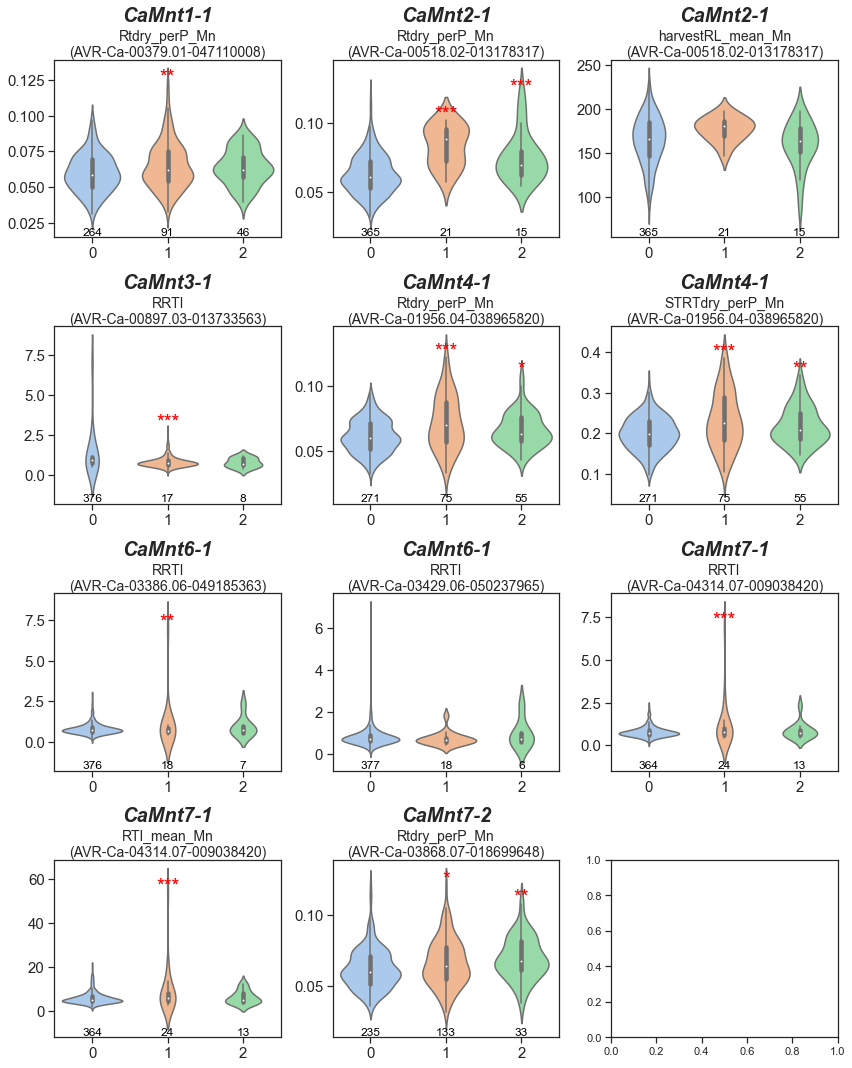

In [25]:
## set plots
sns.set_theme(style="ticks", palette="pastel")
num_subplots = len(df_QTLs)
num_rows = (num_subplots + 1) // 3  # Calculate the number of rows needed
fig, axes = plt.subplots(num_rows, 3, figsize=(12, 15))  # Create subplots with two columns
        
# Calculate counts for each x category
df_tem = df_join.copy()

## plot traits
for index, row in df_QTLs.iterrows():
            QTL = row['QTLs']
            SNP = row['SNP markers']
            Trait = row['Trait']
            
            plotRow = index//3
            plotCol = index%3
            
            order = ["0","1","2"]
            # Draw a violin plot
            sns.violinplot(ax=axes[plotRow, plotCol], x=SNP, y=Trait, order=order, data=df_tem)

            # ticks and labels
            #axes[plotRow, plotCol].set_xlabel(Trait,fontsize=14)
            axes[plotRow, plotCol].set_xlabel("")
            axes[plotRow, plotCol].set_ylabel("")
            axes[plotRow, plotCol].tick_params(axis='x', labelsize=15)
            axes[plotRow, plotCol].tick_params(axis='y', labelsize=15)

             # Perform t-test and annotate p-value for each hue category
            REF = df_tem[df_tem[SNP] == '0'][Trait].dropna()
            ALT = df_tem[df_tem[SNP] == '1'][Trait].dropna()
            HET = df_tem[df_tem[SNP] == '2'][Trait].dropna()
            
            t_stat1, p_value1 = ttest_ind(REF, ALT)
            t_stat2, p_value2 = ttest_ind(REF, HET)
            
            if p_value1 >=0.05:
                annotation_text1 = ""
            elif p_value1 >= 0.01:
                annotation_text1 = "*"
            elif p_value1 >= 0.001:
                annotation_text1 = "**"
            else:
                annotation_text1 = '***'
            
            if p_value2 >=0.05:
                annotation_text2 = ""
            elif p_value2 >= 0.01:
                annotation_text2 = "*"
            elif p_value2 >= 0.001:
                annotation_text2 = "**"
            else:
                annotation_text2 = '***'
                    
            #xtick_labels = [tick.get_text() for tick in axes[index].get_xticklabels()]
            x_pos1 = 1 #xtick_labels.index('1')
            #y_pos1 = min(REF.max(), ALT.max()) # Adjust the y-position as needed
            #y_pos1 = y_pos1 * 1.08
            #y_pos1 = np.percentile(ALT, 75)
            y_pos1 = ALT.max()
            axes[plotRow, plotCol].annotate(annotation_text1, xy=(x_pos1, y_pos1), xycoords="data", 
                                 ha="center", fontsize=20, color='red')
            x_pos2 = 2
            y_pos2 = HET.max()
            axes[plotRow, plotCol].annotate(annotation_text2, xy=(x_pos2, y_pos2), xycoords="data", 
                                 ha="center", fontsize=20, color='red')

            # Annotate the boxplot with counts for each category
            counts = df_tem.dropna(subset=[Trait])[SNP].value_counts()
            for i, count in enumerate(counts):
                ymin, ymax = axes[plotRow, plotCol].get_ylim()
                #axes[row,col].set_ylim(ymin -1, ymax)
                axes[plotRow, plotCol].text(i, ymin, str(count), ha='center', fontsize=12, color='black',va='bottom')
        
            #fig.suptitle(QTL, y=0.95, fontsize=20, fontweight='bold',fontstyle='italic')
            axes[plotRow, plotCol].set_title(QTL, y=1.18, fontsize=20, fontweight='bold',fontstyle='italic', loc='center')
            axes[plotRow, plotCol].text(0.5, 1.13, Trait, transform=axes[plotRow, plotCol].transAxes, ha='center', va='center', fontsize=14)
            axes[plotRow, plotCol].text(0.5, 1.04, "("+SNP+")", transform=axes[plotRow, plotCol].transAxes, ha='center', va='center', fontsize=14)
plt.tight_layout()
plt.show()
fig.savefig("violin_Mn.png", dpi=300)

## extract haplotype for the target snp and plots for each haplotype

In [26]:
df_join.head(2)

,geno_id,geno,plot_id,category,ACCNAME,sowRL_mean_Ctl,sowRL_mean_Mn,harvestRL_mean_Ctl,harvestRL_mean_Mn,RTI_mean_Ctl,...,RStRtdry,AVR-Ca-00379.01-047110008,AVR-Ca-00518.02-013178317,AVR-Ca-00897.03-013733563,AVR-Ca-01956.04-038965820,AVR-Ca-03386.06-049185363,AVR-Ca-03429.06-050237965,AVR-Ca-03868.07-018699648,AVR-Ca-04314.07-009038420,hap
0,Pulse.30K-0043-20-21|1020-CA22.DVRS,Pulse.30K-0043-20-21,1020,CA22.DVRS,1020,35.777778,27.333333,271.111111,135.944444,8.038456,...,0.718666,1,0,1,0,0,0,0,0,H10100000
1,Pulse.30K-0043-20-22|1021-CA22.DVRS,Pulse.30K-0043-20-22,1021,CA22.DVRS,1021,34.222222,33.777778,224.722222,183.333333,6.741617,...,0.897374,1,0,1,0,0,0,0,0,H10100000


In [27]:
keySNPs

['AVR-Ca-00379.01-047110008',
 'AVR-Ca-00518.02-013178317',
 'AVR-Ca-00897.03-013733563',
 'AVR-Ca-01956.04-038965820',
 'AVR-Ca-03386.06-049185363',
 'AVR-Ca-03429.06-050237965',
 'AVR-Ca-04314.07-009038420',
 'AVR-Ca-03868.07-018699648']

In [28]:
## replace 1|0 with 0|1
df_hap = df_join.copy()
df_hap.head(2)

,geno_id,geno,plot_id,category,ACCNAME,sowRL_mean_Ctl,sowRL_mean_Mn,harvestRL_mean_Ctl,harvestRL_mean_Mn,RTI_mean_Ctl,...,RStRtdry,AVR-Ca-00379.01-047110008,AVR-Ca-00518.02-013178317,AVR-Ca-00897.03-013733563,AVR-Ca-01956.04-038965820,AVR-Ca-03386.06-049185363,AVR-Ca-03429.06-050237965,AVR-Ca-03868.07-018699648,AVR-Ca-04314.07-009038420,hap
0,Pulse.30K-0043-20-21|1020-CA22.DVRS,Pulse.30K-0043-20-21,1020,CA22.DVRS,1020,35.777778,27.333333,271.111111,135.944444,8.038456,...,0.718666,1,0,1,0,0,0,0,0,H10100000
1,Pulse.30K-0043-20-22|1021-CA22.DVRS,Pulse.30K-0043-20-22,1021,CA22.DVRS,1021,34.222222,33.777778,224.722222,183.333333,6.741617,...,0.897374,1,0,1,0,0,0,0,0,H10100000


In [29]:
df_hap.dtypes

geno_id                       object
geno                          object
plot_id                        int64
category                      object
ACCNAME                        int64
sowRL_mean_Ctl               float64
sowRL_mean_Mn                float64
harvestRL_mean_Ctl           float64
harvestRL_mean_Mn            float64
RTI_mean_Ctl                 float64
RTI_mean_Mn                  float64
ChangeRL_mean_Ctl            float64
ChangeRL_mean_Mn             float64
Stdry_perP_Ctl               float64
Stdry_perP_Mn                float64
Rtdry_perP_Ctl               float64
Rtdry_perP_Mn                float64
STRTdry_perP_Ctl             float64
STRTdry_perP_Mn              float64
RTI                          float64
RRTI                         float64
RRtdry                       float64
RStdry                       float64
RStRtdry                     float64
AVR-Ca-00379.01-047110008     object
AVR-Ca-00518.02-013178317     object
AVR-Ca-00897.03-013733563     object
A

In [30]:
df_hap.to_csv("df_hap_keySNPs.csv",index=False)

In [31]:
hap_count = df_hap['hap'].value_counts()
print(hap_count)

H10100000    82
H00100000    51
H10100001    38
H10110001    19
H10110000    16
             ..
H12210001     1
H20110001     1
H10102202     1
H12110002     1
H20120022     1
Name: hap, Length: 70, dtype: int64


In [32]:
count_00000000 = (df_hap['hap'] == 'H00000000').sum()
count_00000000

1

## plot haplotype traits

In [34]:
## only include haplotype count bigger than 5
# 1. Count the unique values in 'Category' column
value_counts = df_hap['hap'].value_counts()
filtered_df = df_hap[df_hap['hap'].isin(value_counts[value_counts >= 5].index)]
filtered_df['hap'] = filtered_df['hap'].str.replace("H","") ## remove "H"

In [35]:
filtered_df.head(2)

,geno_id,geno,plot_id,category,ACCNAME,sowRL_mean_Ctl,sowRL_mean_Mn,harvestRL_mean_Ctl,harvestRL_mean_Mn,RTI_mean_Ctl,...,RStRtdry,AVR-Ca-00379.01-047110008,AVR-Ca-00518.02-013178317,AVR-Ca-00897.03-013733563,AVR-Ca-01956.04-038965820,AVR-Ca-03386.06-049185363,AVR-Ca-03429.06-050237965,AVR-Ca-03868.07-018699648,AVR-Ca-04314.07-009038420,hap
0,Pulse.30K-0043-20-21|1020-CA22.DVRS,Pulse.30K-0043-20-21,1020,CA22.DVRS,1020,35.777778,27.333333,271.111111,135.944444,8.038456,...,0.718666,1,0,1,0,0,0,0,0,10100000
1,Pulse.30K-0043-20-22|1021-CA22.DVRS,Pulse.30K-0043-20-22,1021,CA22.DVRS,1021,34.222222,33.777778,224.722222,183.333333,6.741617,...,0.897374,1,0,1,0,0,0,0,0,10100000


In [36]:
filtered_df.shape

(320, 33)

In [37]:
df_QTLs['Trait'].unique()

array(['Rtdry_perP_Mn', 'harvestRL_mean_Mn', 'RRTI', 'STRTdry_perP_Mn',
       'RTI_mean_Mn'], dtype=object)

In [38]:
traits = df_QTLs['Trait'].unique()
len(traits)

5

In [39]:
len(traits)

5

In [40]:
filtered_df.head(2)

,geno_id,geno,plot_id,category,ACCNAME,sowRL_mean_Ctl,sowRL_mean_Mn,harvestRL_mean_Ctl,harvestRL_mean_Mn,RTI_mean_Ctl,...,RStRtdry,AVR-Ca-00379.01-047110008,AVR-Ca-00518.02-013178317,AVR-Ca-00897.03-013733563,AVR-Ca-01956.04-038965820,AVR-Ca-03386.06-049185363,AVR-Ca-03429.06-050237965,AVR-Ca-03868.07-018699648,AVR-Ca-04314.07-009038420,hap
0,Pulse.30K-0043-20-21|1020-CA22.DVRS,Pulse.30K-0043-20-21,1020,CA22.DVRS,1020,35.777778,27.333333,271.111111,135.944444,8.038456,...,0.718666,1,0,1,0,0,0,0,0,10100000
1,Pulse.30K-0043-20-22|1021-CA22.DVRS,Pulse.30K-0043-20-22,1021,CA22.DVRS,1021,34.222222,33.777778,224.722222,183.333333,6.741617,...,0.897374,1,0,1,0,0,0,0,0,10100000


<Figure size 432x288 with 0 Axes>

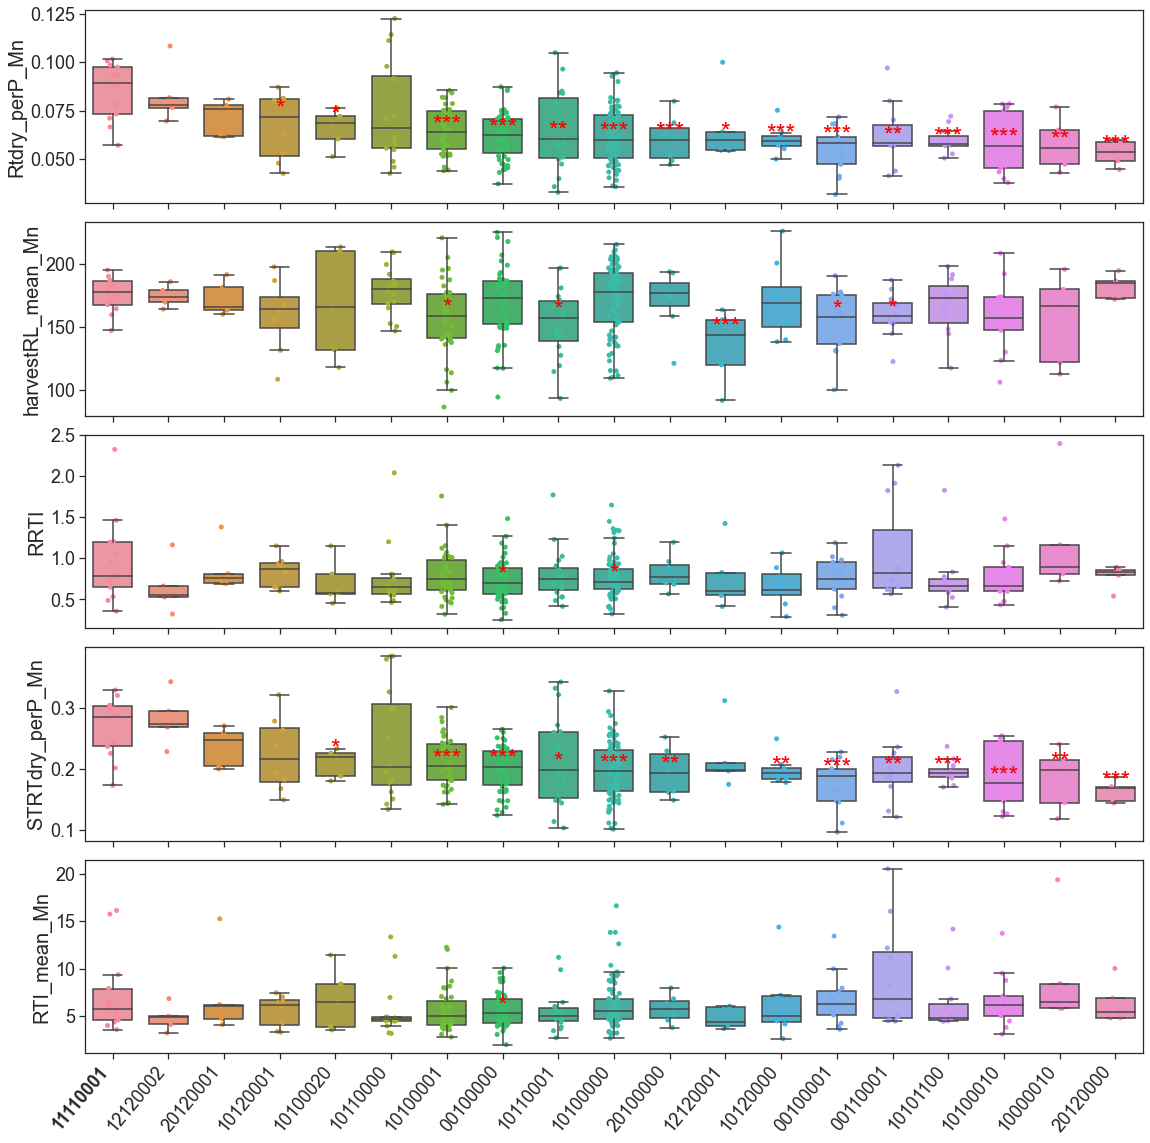

In [42]:
traits = df_QTLs['Trait'].unique()
sns.despine(bottom=True, left=True)
fig, axes = plt.subplots(5,1,figsize=(16, 16), sharex=True)
# hap_order = filtered_df['hap'].value_counts().index.to_list()
# hap_count = filtered_df['hap'].value_counts().to_list()
# first_hap_group = hap_order[0]
median_values = filtered_df.groupby('hap')['Rtdry_perP_Mn'].median()
sorted_median_values = median_values.sort_values(ascending=False)
hap_order = sorted_median_values.index.to_list()

for index, trait in enumerate(traits):
        # Show each observation with a scatterplot
        sns.boxplot(ax = axes[index], data=filtered_df, y=trait, x='hap', order=hap_order, 
                    showfliers=False, width=0.7)
        sns.stripplot(ax = axes[index], data=filtered_df, y=trait, x='hap', order=hap_order, zorder=1)
        axes[index].set_ylabel(trait, fontsize=20)
        axes[index].set_xlabel("")
        axes[index].tick_params(axis='x', labelsize=18)
        axes[index].tick_params(axis='y', labelsize=18)
        
        # Perform Student's t-test for each haplotype group compared to the first group
        for i, hap_group in enumerate(hap_order):
            if hap_group == '11110001':
                continue  # Skip comparison of the first group with itself
            else:
                ALT = filtered_df[filtered_df['hap'] == hap_group][trait]
                REF = filtered_df[filtered_df['hap'] == '11110001'][trait]
                
                t_stat, p_value = ttest_ind(REF, ALT)
                if p_value >=0.05:
                    annotation_text = ""
                elif p_value >= 0.01:
                    annotation_text = "*"
                elif p_value >= 0.001:
                    annotation_text = "**"
                else:
                    annotation_text = '***'
                    
                # Add p-value annotation to the plot
                ## y_pos = ALT.max() + 1
                y_pos = filtered_df[filtered_df['hap'] == hap_group][trait].median()
                
                axes[index].annotate(annotation_text, xy=(i, y_pos), xycoords="data", 
                                 ha="center", fontsize=25, color='red')

# axes[2].set_ylabel("RTI", fontsize=20)
# axes[2].set_xlabel("Haplotype", fontsize = 24, fontweight='bold')
plt.xticks(rotation=50, ha='right', fontsize=18)
plt.yticks(fontsize=18)
## color refer haplotype as red
xtick_labels = axes[4].get_xticklabels()
#xtick_labels[10].set_color('red')
xtick_labels[0].set_fontweight('bold')

plt.tight_layout()
plt.show()
fig.savefig("Haplotype_plot_DVRS_sorted_by_Rtdry.png")

In [43]:
df_join.head(2)

,geno_id,geno,plot_id,category,ACCNAME,sowRL_mean_Ctl,sowRL_mean_Mn,harvestRL_mean_Ctl,harvestRL_mean_Mn,RTI_mean_Ctl,...,RStRtdry,AVR-Ca-00379.01-047110008,AVR-Ca-00518.02-013178317,AVR-Ca-00897.03-013733563,AVR-Ca-01956.04-038965820,AVR-Ca-03386.06-049185363,AVR-Ca-03429.06-050237965,AVR-Ca-03868.07-018699648,AVR-Ca-04314.07-009038420,hap
0,Pulse.30K-0043-20-21|1020-CA22.DVRS,Pulse.30K-0043-20-21,1020,CA22.DVRS,1020,35.777778,27.333333,271.111111,135.944444,8.038456,...,0.718666,1,0,1,0,0,0,0,0,H10100000
1,Pulse.30K-0043-20-22|1021-CA22.DVRS,Pulse.30K-0043-20-22,1021,CA22.DVRS,1021,34.222222,33.777778,224.722222,183.333333,6.741617,...,0.897374,1,0,1,0,0,0,0,0,H10100000


In [44]:
df_join.columns

Index(['geno_id', 'geno', 'plot_id', 'category', 'ACCNAME', 'sowRL_mean_Ctl',
       'sowRL_mean_Mn', 'harvestRL_mean_Ctl', 'harvestRL_mean_Mn',
       'RTI_mean_Ctl', 'RTI_mean_Mn', 'ChangeRL_mean_Ctl', 'ChangeRL_mean_Mn',
       'Stdry_perP_Ctl', 'Stdry_perP_Mn', 'Rtdry_perP_Ctl', 'Rtdry_perP_Mn',
       'STRTdry_perP_Ctl', 'STRTdry_perP_Mn', 'RTI', 'RRTI', 'RRtdry',
       'RStdry', 'RStRtdry', 'AVR-Ca-00379.01-047110008',
       'AVR-Ca-00518.02-013178317', 'AVR-Ca-00897.03-013733563',
       'AVR-Ca-01956.04-038965820', 'AVR-Ca-03386.06-049185363',
       'AVR-Ca-03429.06-050237965', 'AVR-Ca-03868.07-018699648',
       'AVR-Ca-04314.07-009038420', 'hap'],
      dtype='object')

In [58]:
df_hap = pd.read_csv("df_hap_keySNPs.csv",header=0)
df_hap.head(2)

,geno_id,geno,plot_id,category,ACCNAME,sowRL_mean_Ctl,sowRL_mean_Mn,harvestRL_mean_Ctl,harvestRL_mean_Mn,RTI_mean_Ctl,...,RStRtdry,AVR-Ca-00379.01-047110008,AVR-Ca-00518.02-013178317,AVR-Ca-00897.03-013733563,AVR-Ca-01956.04-038965820,AVR-Ca-03386.06-049185363,AVR-Ca-03429.06-050237965,AVR-Ca-03868.07-018699648,AVR-Ca-04314.07-009038420,hap
0,Pulse.30K-0043-20-21|1020-CA22.DVRS,Pulse.30K-0043-20-21,1020,CA22.DVRS,1020,35.777778,27.333333,271.111111,135.944444,8.038456,...,0.718666,1,0,1,0,0,0,0,0,H10100000
1,Pulse.30K-0043-20-22|1021-CA22.DVRS,Pulse.30K-0043-20-22,1021,CA22.DVRS,1021,34.222222,33.777778,224.722222,183.333333,6.741617,...,0.897374,1,0,1,0,0,0,0,0,H10100000


In [59]:
for snp in ['AVR-Ca-00379.01-047110008',
           'AVR-Ca-00518.02-013178317', 
            'AVR-Ca-01956.04-038965820', 
            'AVR-Ca-03386.06-049185363',
           'AVR-Ca-04314.07-009038420']:
    df_hap[snp] = df_hap[snp].replace({1: '+', 0: '-'})


for snp in ['AVR-Ca-00897.03-013733563',
           'AVR-Ca-03429.06-050237965',
            'AVR-Ca-03868.07-018699648']:
    df_hap[snp] = df_hap[snp].replace({1: '-', 0: '+'})

columns_to_join = ['AVR-Ca-00379.01-047110008',
       'AVR-Ca-00518.02-013178317', 'AVR-Ca-00897.03-013733563',
       'AVR-Ca-01956.04-038965820', 'AVR-Ca-03386.06-049185363',
       'AVR-Ca-03429.06-050237965', 'AVR-Ca-04314.07-009038420',
                   'AVR-Ca-03868.07-018699648']
df_hap["Effect"] = df_hap[columns_to_join].astype(str).agg(''.join, axis=1)


In [60]:
df_hap["Effect"] = "'" + df_hap["Effect"]
df_hap.to_csv("df_hap_keySNPs_effect.csv",index=None)

In [61]:
karthika = [3031,
5030,
10004,
4030,
16020,
8019,
8023,
14027,
11023,
17014,
18031,
18023,
11008,
12014,
11011,
8028,
41006,
17005]

In [62]:
df_karthika = df_hap[df_hap['plot_id'].isin(karthika)]
df_karthika.shape

(15, 34)

In [63]:
df_selection = pd.read_excel("Mn_signals.xlsx",sheet_name='karthika',header=0)
df_selection

,No,Accession name,WCGA Name,Northam-ID,RSG (%),RRG (%),RPG (%),Mn scores,RRL (%)
0,1,SKOROSPELXA,WCGACA00553,3031,117.8,96.80,110.10,2.1 (only 2 plants in 150 Mn),83.3
1,2,ILC 01269,WCGACA00364,5030,105,103.80,104.60,1.79,106.7
2,3,ICC 03616,WCGACA00242,10004,104.5,94.10,101.10,2.36,90.6
3,4,ILC 00216,WCGACA00348,4030,102,93.50,98.90,1.45,91.4
4,5,DR3-262,WCGACA00117,16020,97.9,91.80,95.90,1.74,107.5
5,6,ILC 03089,WCGACA00370,8019,96.3,88.70,94.10,1.97,93.2
6,7,ILC 01300,WCGACA00365,8023,97.2,86.60,93.60,1.36,71.4
7,8,PBA Pistol,WCGACA00532,14027,87.9,88.70,88.10,2.26,88.9
8,9,ILC 10664,WCGACA00470,11023,90.3,82.60,87.80,0.92,69.2
9,10,PBA Seamer,WCGACA00533,17014,89,84.20,87.40,2.36,104.1


In [64]:
df_merged = df_selection.merge(df_karthika,left_on='Northam-ID', right_on='plot_id',how='left')
df_merged.to_csv("karthika_selection_haplotype.csv",index=0)

In [49]:
## extract haplotype